# Lineáris Regresszió 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

### Adatok beolvasása

In [3]:
df = pd.read_csv('gdp_kisajatitas.csv')
df.head()

,shortnam,logpgp95,avexpr
0,AFG,NaN,NaN
1,AGO,7.770645,5.363637
2,ARE,9.804219,7.181818
3,ARG,9.133459,6.386363
4,ARM,7.682482,NaN


### Adatok ábrázolása

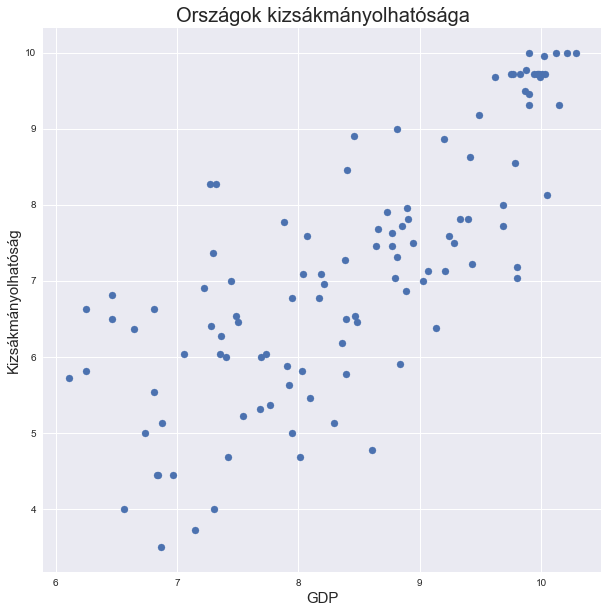

In [4]:
plt.style.use('seaborn')

plt.figure(figsize=(10, 10))
plt.title("Országok kizsákmányolhatósága", size=20)
plt.scatter(x='logpgp95', y='avexpr', data=df)
plt.ylabel('Kizsákmányolhatóság', size=15)
plt.xlabel("GDP", size=15)
plt.show()

### Adatok tisztítása

In [5]:
df_clean = df.dropna().copy()
df_clean['const'] = 1 # az y tengelymetszet nem lehet 0, mert nincs 0 GDP ország

# Változók felvétele
x = df_clean.loc[:, 'logpgp95']
y = df_clean.loc[:, 'avexpr']
labels = df_clean.loc[:, 'shortnam']

df_clean.head()

,shortnam,logpgp95,avexpr,const
1,AGO,7.770645,5.363637,1
2,ARE,9.804219,7.181818,1
3,ARG,9.133459,6.386363,1
5,AUS,9.897972,9.318182,1
6,AUT,9.974877,9.727273,1


### Rergressziós modell felállítása

In [6]:
reg1 = sm.OLS(endog=y, exog=df_clean[['const', 'avexpr']]) #endog: függő változó, exog: független változó

print("Reg1 type:")
print(type(reg1))

# A tanítás eljárása
results = reg1.fit()

type(results)

# A modell
print(results.summary())

Reg1 type:
<class 'statsmodels.regression.linear_model.OLS'>
                            OLS Regression Results                            
Dep. Variable:                 avexpr   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.182e+32
Date:                Thu, 10 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:05:28   Log-Likelihood:                 3623.4
No. Observations:                 111   AIC:                            -7243.
Df Residuals:                     109   BIC:                            -7237.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

### Lineáris trendvonal illesztése

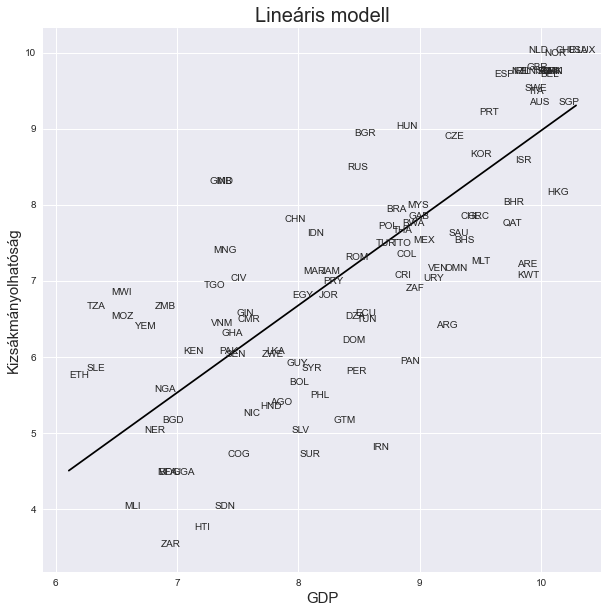

In [7]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x, y, marker='')

for i, label in enumerate(labels):
    ax.annotate(label, (x.iloc[i], y.iloc[i]))
    
line = np.poly1d(np.polyfit(x, y, 1))(np.unique(x))
ax.plot(np.unique(x), line, color='black')

ax.set_title("Lineáris modell", size=20)
ax.set_xlabel("GDP", size=15)
ax.set_ylabel("Kizsákmányolhatóság", size=15)
plt.show()

### Predikciók készítése

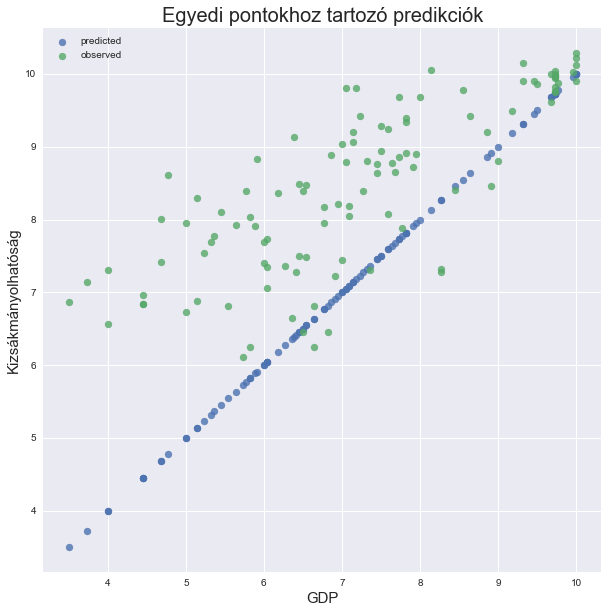

In [8]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(df_clean['avexpr'], results.predict(), alpha=0.8, label='predicted')

ax.scatter(df_clean['avexpr'], df_clean['logpgp95'], alpha=0.8, label='observed')

ax.legend()
ax.set_title("Egyedi pontokhoz tartozó predikciók", size=20)
ax.set_xlabel("GDP", size=15)
ax.set_ylabel("Kizsákmányolhatóság", size=15)
plt.show()

### Gradiens ereszkedés: a kezdeti egyenes felvétele

In [9]:
#Egyenes ábrázolása
def plotf():
    plt.figure(figsize=(10, 10))
    plt.scatter(x, y)
    plt.plot(x, f, color='red')

Hiba: 6077.470065214054


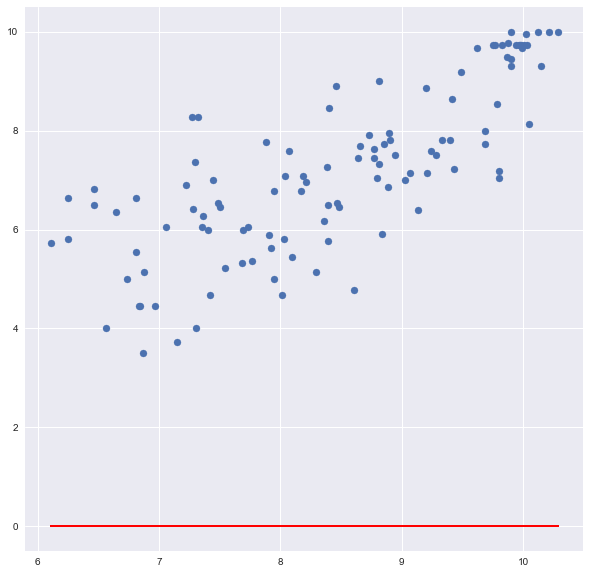

In [10]:
# Paraméterek felvétele
b0 = 0
b1 = 0

#Egyenes egyenlete
f = b0 + b1*x

#Eltérés-négyzet
print("Hiba:", np.sum((f - y)**2))

plotf()

### b0 és b1 közelítése az optimálishoz

b0:  0.09490185016867768  b1:  0.8404181226566587
Hiba: 135.20569457958652


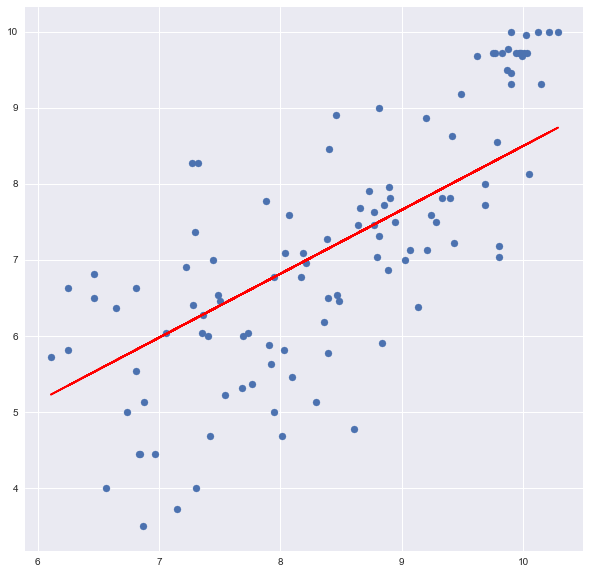

In [38]:
#Tanulási sebesség
alpha = 0.00001

b0 = b0 - np.sum(2*(b0 + b1*x - y))*alpha
b1 = b1 - np.sum(2*(b0 + b1*x - y)*x)*alpha

# Regresszió fgv újraszámolása
f = b0 + b1*x

print('b0: ', b0, ' b1: ', b1)
print('Hiba:', np.sum((f - y)**2))

plotf()

### Hiba számolása ciklikusan

b0:  -0.0021552025202711224  b1:  0.8574567494266527
Hiba:  133.9441323155976


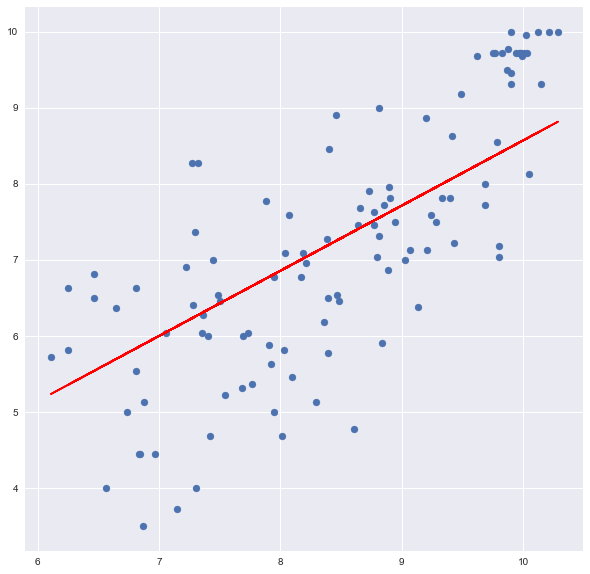

In [39]:
b0=0
b1=0

hibakovetes = []
alpha = 0.00001

for i in range(1000):
    b0 = b0 - np.sum(2*(b0 + b1*x - y))*alpha
    b1 = b1 - np.sum(2*(b0 + b1*x - y)*x)*alpha
    hibakovetes.append(np.sum((b0 + b1*x - y)**2))
    
    
f = b0 + b1*x
print('b0: ', b0, ' b1: ', b1)
print('Hiba: ', np.sum((f - y)**2))
plotf()

### A számolt hiba ábrázolása

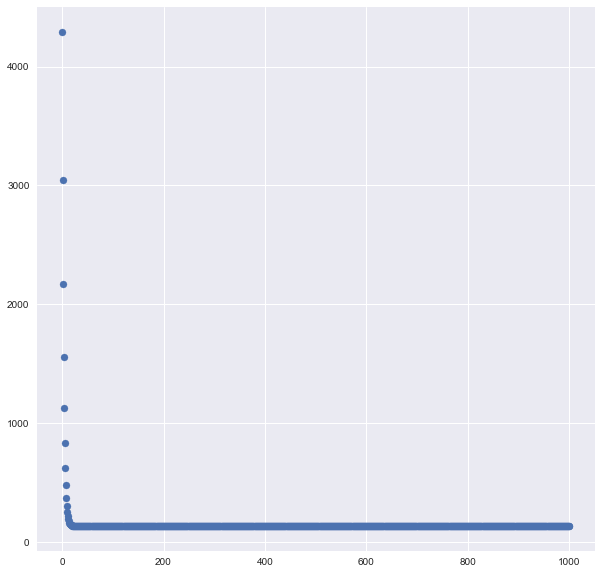

In [40]:
plt.figure(figsize=(10, 10))
plt.scatter(np.linspace(0, len(hibakovetes), len(hibakovetes)), hibakovetes)

### Hiba változása százalékban kifejezve, az első száz elemre

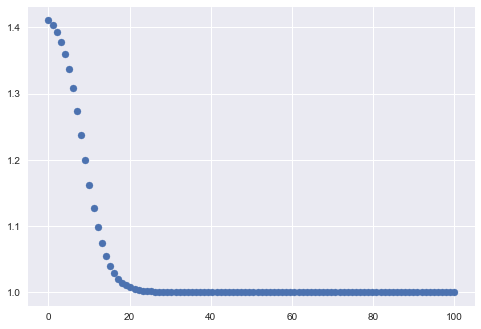

In [41]:
hibaszazalek = []
for i in range(1, len(hibakovetes)):
    hibaszazalek.append(hibakovetes[i-1] / hibakovetes[i])

hibaszazalek = hibaszazalek[:100]
plt.scatter(np.linspace(0, len(hibaszazalek), len(hibaszazalek)), hibaszazalek)